In [135]:
# %pip install tqdm
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.stats as stats  
from itertools import combinations
from collections import defaultdict

plt.rc('axes', axisbelow=True)

In [93]:
with open("out/2006.json") as file:
    data2006 = json.load(file)

with open("out/2015.json") as file:
    data2015 = json.load(file)

with open("out/2023.json") as file:
    data2023 = json.load(file)

In [94]:
def load_graph(data):
    graph = nx.DiGraph()
    for page, links in data.items():
        for link in links:
            graph.add_edge(page, link)
    return graph

graph2006 = load_graph(data2006)
graph2015 = load_graph(data2015)
graph2023 = load_graph(data2023)

In [95]:
test = np.array([x[1] for x in nx.degree(graph2006)])
test = (test - test.min())
test = test / test.sum()

3.1986890618598935 4.8216754627220695 5.114915844457342


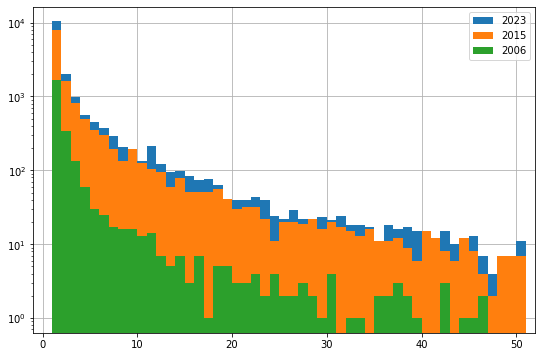

In [104]:
def hist(data: np.ndarray):
    hist, _ = np.histogram(data, 50, (0, 50))
    return hist

def normalize(data: np.ndarray):
    _ = data - data.min()
    return _ / data.sum()

_1 = np.array([x[1] for x in nx.degree(graph2006)])
_2 = np.array([x[1] for x in nx.degree(graph2015)])
_3 = np.array([x[1] for x in nx.degree(graph2023)])

print(_1.mean(), _2.mean(), _3.mean())

fig, ax = plt.subplots(figsize=(9,6))
ax.grid(True)
ax.hist(_3, label="2023", bins=50, range=(1, 51),  )
ax.hist(_2, label="2015", bins=50, range=(1, 51),  )
ax.hist(_1, label="2006", bins=50, range=(1, 51),  )
ax.set_xlim(-1, 52)
ax.set_yscale("log")
ax.legend()

In [32]:
y, x = np.histogram(_1, bins=50, range=(1, 51))
alpha, loc, beta = stats.gamma.fit(y)
print(alpha, beta, loc)
print(np.mean(_1))


0.15168890700110493 933.3179616560271 -3.8180702609565334e-27
3.1986890618598935


In [7]:
print(np.mean([x[1] for x in nx.degree(graph2006)]))
print(np.mean([x[1] for x in nx.degree(graph2015)]))
print(np.mean([x[1] for x in nx.degree(graph2023)]))

3.1986890618598935
4.8216754627220695
5.114915844457342


In [ ]:
len(list(nx.strongly_connected_components(graph2006)))

2393

(array([6., 2., 2., 2., 1., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]),
 <BarContainer object of 12 artists>)

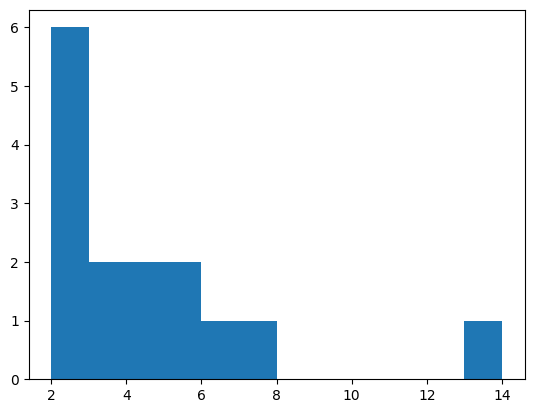

In [ ]:
plt.hist([len(c) for c in sorted(nx.strongly_connected_components(graph2006), key=len, reverse=True)], bins=12, range=(2,14))

In [ ]:
print(np.log10(nx.density(graph2006)))
print(np.log10(nx.density(graph2015)))
print(np.log10(nx.density(graph2023)))

-3.1834477967612638
-3.746618878769546
-3.8284515739907192


In [111]:
sorted(list(nx.degree(graph2015)), key=lambda a: a[1], reverse=True)

[('Język angielski', 403),
 ('Pulpit', 306),
 ('Architektura Windows NT', 296),
 ('Installable File System', 252),
 ('Portal:Informatyka', 224),
 ('Siri', 223),
 ('Wizualizacja', 216),
 ('Jednolity System Elektronicznych Maszyn Cyfrowych', 201),
 ('Kontrola autorytatywna', 196),
 ('Notacja Diraca', 188),
 ('Processing', 186),
 ('Przeglądarka internetowa', 176),
 ('Office Open XML', 176),
 ('Znak wodny', 175),
 ('Sawik', 172),
 ('Analiza numeryczna', 172),
 ('Infrared Data Association', 172),
 ('Uniwersytecki System Obsługi Studiów', 170),
 ('Teoria informacji', 166),
 ('National Security Agency', 166),
 ('Transfer umysłu', 165),
 ('Komputer', 164),
 ('Teoria obliczeń', 163),
 ('QCL', 162),
 ('Digitalizacja (bibliotekarstwo)', 162),
 ('Geometria obliczeniowa', 161),
 ('MOST (język)', 159),
 ('Teoria obliczalności', 154),
 ('Program komputerowy', 153),
 ('System operacyjny', 151),
 ('MIDI', 150),
 ('Direct Media Interface', 148),
 ('Optymalizacja (matematyka)', 147),
 ('Library of Congre

In [155]:
ret = defaultdict(int)

for source, targets in dict(nx.all_pairs_shortest_path(graph2023)).items():
    for target, path in targets.items():
        if source == target:
            continue
        for node in path:
            ret[node] += 1

In [156]:
y = list(sorted(ret.items(), key=lambda a: a[1], reverse=True))

In [157]:
y[:10]

[('Informatyka', 8846468),
 ('Oprogramowanie', 2031364),
 ('Program komputerowy', 1580541),
 ('Urządzenie wejścia-wyjścia', 1276868),
 ('Sztuczna inteligencja', 1246709),
 ('Infrared Data Association', 1211621),
 ('Skróty używane w informatyce', 1095745),
 ('Bezpieczeństwo teleinformatyczne', 1027207),
 ('Dwójkowy system liczbowy', 998476),
 ('Implementacja (informatyka)', 936559)]

In [158]:
y[-10:]

[('Libération', 1),
 ('Paris 8 Vincennes Saint-Denis', 1),
 ('Rabat (Maroko)', 1),
 ('Rewolucja goździków', 1),
 ('Wykładowca', 1),
 ('École nationale des ponts et chaussées', 1),
 ('„Pierre Audibert”', 1),
 ('Metoda wzmocnionego spadku', 1),
 ('Roger Mead', 1),
 ('Sympleks (matematyka)', 1)]